# **Introduction**

Netflix, a leading media and video streaming platform,
hosts over 10,000 movies and TV shows and has over 222 million subscribers globally as of mid-2021.This project involves analyzing a tabular dataset containing information on all Netflix content, including cast, directors, ratings, release year, and duration. The goal is to generate insights to help Netflix decide which types of shows/movies to produce and identify strategies for business growth in different countries.





In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
data=pd.read_csv('/content/drive/MyDrive/Project Practice /netflix.csv')

In [4]:
data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


# **Problem Statement**


* Netflix aims to enhance its content strategy and expand
its global footprint by understanding which types of shows and movies resonate most with audiences.
* The objective is to leverage data analytics to identify
content trends, popular genres, and regional preferences to guide future content production and strategic decision-making.
* By analyzing key metrics such as viewer ratings, cast and crew contributions, release years, and content duration, Netflix can gain valuable insights to optimize its content library and target growth opportunities in different countries.

# **Analyzing Basic Matrics**



1.   Content Types and Popularity
2.   Regional Preferences
3.   Cast and Crew Influence
4.   Content Duration
5.   Subscription Growth


 By systematically evaluating these metrics, Netflix can tailor its content creation to better meet viewer demands, strategically plan regional expansions, and ultimately, enhance subscriber satisfaction and growth. This comprehensive analysis will provide a data-driven foundation for Netflix’s content strategy and market expansion plans.





In [5]:
data.shape

(8807, 12)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB



The dataset comprises 8,807 rows and 12 columns, with some tables containing missing values.

In [7]:
data.describe(include='all')

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
count,8807,8807,8807,6173,7982,7976,8797,8807.000000,8803,8804,8807,8807
unique,8807,2,8807,4528,7692,748,1767,NaN,17,220,514,8775
top,s1,Movie,Dick Johnson Is Dead,Rajiv Chilaka,David Attenborough,United States,"January 1, 2020",NaN,TV-MA,1 Season,"Dramas, International Movies","Paranormal activity at a lush, abandoned prope..."
freq,1,6131,1,19,19,2818,109,NaN,3207,1793,362,4
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2014.180198,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.819312,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1925.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013.000000,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017.000000,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019.000000,NaN,NaN,NaN,NaN


In [8]:
#Unique values of type.
type_counts = data['type'].value_counts()
print(type_counts)

type
Movie      6131
TV Show    2676
Name: count, dtype: int64


There are basically 6131 types of Movies and 2676 types of shoes.

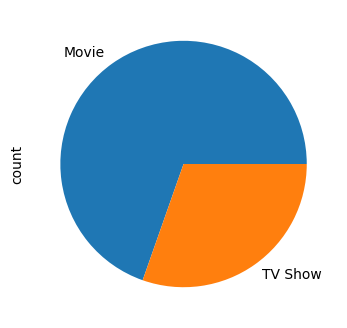

In [9]:
plot=type_counts.plot.pie(y='type_counts',figsize=(4,4))

In [10]:
data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [11]:
#Value count for rating column
rating_counts = data['rating'].value_counts()
print(rating_counts)

rating
TV-MA       3207
TV-14       2160
TV-PG        863
R            799
PG-13        490
TV-Y7        334
TV-Y         307
PG           287
TV-G         220
NR            80
G             41
TV-Y7-FV       6
NC-17          3
UR             3
74 min         1
84 min         1
66 min         1
Name: count, dtype: int64


In [12]:
release_year_counts = data['release_year'].value_counts().sort_index()
print(release_year_counts)

release_year
1925       1
1942       2
1943       3
1944       3
1945       4
        ... 
2017    1032
2018    1147
2019    1030
2020     953
2021     592
Name: count, Length: 74, dtype: int64


In [13]:
#Value counts for movies release in last 30 years
recent_release_counts = data[data['release_year'] >= 1991]['release_year'].value_counts().sort_index()
print(recent_release_counts)

release_year
1991      17
1992      23
1993      28
1994      22
1995      25
1996      24
1997      38
1998      36
1999      39
2000      37
2001      45
2002      51
2003      61
2004      64
2005      80
2006      96
2007      88
2008     136
2009     152
2010     194
2011     185
2012     237
2013     288
2014     352
2015     560
2016     902
2017    1032
2018    1147
2019    1030
2020     953
2021     592
Name: count, dtype: int64


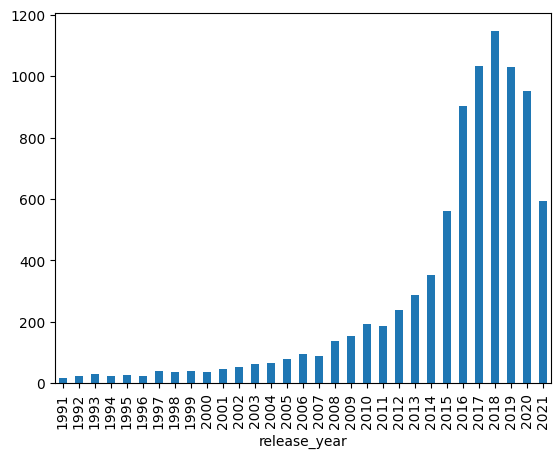

In [14]:
plot=recent_release_counts.plot.bar(x='release_year',y='recent_release_counts')

The chart demonstrates a significant increase in the number of movies released over the past seven years, with 2018 witnessing the peak followed closely by 2017 and 2019.


In [15]:
#unique values in type column
unique_types = data['type'].unique()
print("Unique values in 'type':",unique_types)

print("--"*30)

#unique values in rating calumns
unique_ratings = data['rating'].unique()
print("Unique values in 'rating':",unique_ratings)

print("--"*30)


# Unique values in the 'director' column (excluding missing values)
unique_directors = data['director'].dropna().unique()
print("Unique values in 'director':", unique_directors)


Unique values in 'type': ['Movie' 'TV Show']
------------------------------------------------------------
Unique values in 'rating': ['PG-13' 'TV-MA' 'PG' 'TV-14' 'TV-PG' 'TV-Y' 'TV-Y7' 'R' 'TV-G' 'G'
 'NC-17' '74 min' '84 min' '66 min' 'NR' nan 'TV-Y7-FV' 'UR']
------------------------------------------------------------
Unique values in 'director': ['Kirsten Johnson' 'Julien Leclercq' 'Mike Flanagan' ... 'Majid Al Ansari'
 'Peter Hewitt' 'Mozez Singh']


In [16]:
#unique values in country columns (as we checked before so excluding the null values)
unique_countries = data['country'].dropna().unique()
print("Unique values in 'country':",unique_countries)

Unique values in 'country': ['United States' 'South Africa' 'India'
 'United States, Ghana, Burkina Faso, United Kingdom, Germany, Ethiopia'
 'United Kingdom' 'Germany, Czech Republic' 'Mexico' 'Turkey' 'Australia'
 'United States, India, France' 'Finland' 'China, Canada, United States'
 'South Africa, United States, Japan' 'Nigeria' 'Japan'
 'Spain, United States' 'France' 'Belgium' 'United Kingdom, United States'
 'United States, United Kingdom' 'France, United States' 'South Korea'
 'Spain' 'United States, Singapore' 'United Kingdom, Australia, France'
 'United Kingdom, Australia, France, United States'
 'United States, Canada' 'Germany, United States'
 'South Africa, United States' 'United States, Mexico'
 'United States, Italy, France, Japan'
 'United States, Italy, Romania, United Kingdom'
 'Australia, United States' 'Argentina, Venezuela'
 'United States, United Kingdom, Canada' 'China, Hong Kong' 'Russia'
 'Canada' 'Hong Kong' 'United States, China, Hong Kong'
 'Italy, United S

In [17]:
# Unique values in the 'director' column (excluding missing values)
unique_directors = data['director'].dropna().unique()
print("Unique values in 'director':", unique_directors)

Unique values in 'director': ['Kirsten Johnson' 'Julien Leclercq' 'Mike Flanagan' ... 'Majid Al Ansari'
 'Peter Hewitt' 'Mozez Singh']


In [18]:
data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [19]:
#check for missing values
missing_values=data.isnull().sum()
print(missing_values)

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64


In [21]:
# Split the data in the columns into lists
data['actor_list'] = data['cast'].apply(lambda x: x.split(',') if pd.notnull(x) else [])
data['director'] = data['director'].apply(lambda x: x.split(',') if pd.notnull(x) else [])
data['country']=data['country'].apply(lambda x: x.split(',')  if pd.notnull(x) else [])

In [22]:
data['actor_list'].shape

(8807,)

In [23]:
data['actor_list'].head()

0                                                   []
1    [Ama Qamata,  Khosi Ngema,  Gail Mabalane,  Th...
2    [Sami Bouajila,  Tracy Gotoas,  Samuel Jouy,  ...
3                                                   []
4    [Mayur More,  Jitendra Kumar,  Ranjan Raj,  Al...
Name: actor_list, dtype: object

In [24]:
actor_list=data['actor_list'].notnull()
print(actor_list)

0       True
1       True
2       True
3       True
4       True
        ... 
8802    True
8803    True
8804    True
8805    True
8806    True
Name: actor_list, Length: 8807, dtype: bool


In [25]:
data['director'].head(10)

0                   [Kirsten Johnson]
1                                  []
2                   [Julien Leclercq]
3                                  []
4                                  []
5                     [Mike Flanagan]
6    [Robert Cullen,  José Luis Ucha]
7                      [Haile Gerima]
8                   [Andy Devonshire]
9                    [Theodore Melfi]
Name: director, dtype: object

In [26]:
Directors=data['director'].notnull()
print(Directors)

0       True
1       True
2       True
3       True
4       True
        ... 
8802    True
8803    True
8804    True
8805    True
8806    True
Name: director, Length: 8807, dtype: bool


In [27]:
data['director'].shape

(8807,)

In [28]:
data['country'].head()

0    [United States]
1     [South Africa]
2                 []
3                 []
4            [India]
Name: country, dtype: object

In [29]:
data['country'].shape

(8807,)

In [30]:
countries=data['country'].notnull()
print(countries)

0       True
1       True
2       True
3       True
4       True
        ... 
8802    True
8803    True
8804    True
8805    True
8806    True
Name: country, Length: 8807, dtype: bool


In [31]:
data=pd.read_csv('/content/drive/MyDrive/Project Practice /netflix.csv')
data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [32]:
#lets convert the duration form object data type to numeric data type and here we are also asumming 1 season = 60 mins
def extract_duration(duration):
  if isinstance(duration, str):
    if 'min' in duration:
      return int(duration.split()[0])
    elif 'Seasons' or 'Season' in duration:
        return int(duration.split()[0])*60   # Assuming one season equals 60 minutes for example purposes
    else:
        return 0

# Apply the function to the 'duration' column
data['duration_numeric'] = data['duration'].apply(extract_duration)

In [33]:
data['duration_numeric'].head(10)

0     90.0
1    120.0
2     60.0
3     60.0
4    120.0
5     60.0
6     91.0
7    125.0
8    540.0
9    104.0
Name: duration_numeric, dtype: float64

In [34]:
data['duration_numeric'].describe()

count    8804.000000
mean      101.498069
std        57.497442
min         3.000000
25%        60.000000
50%        95.000000
75%       118.000000
max      1020.000000
Name: duration_numeric, dtype: float64

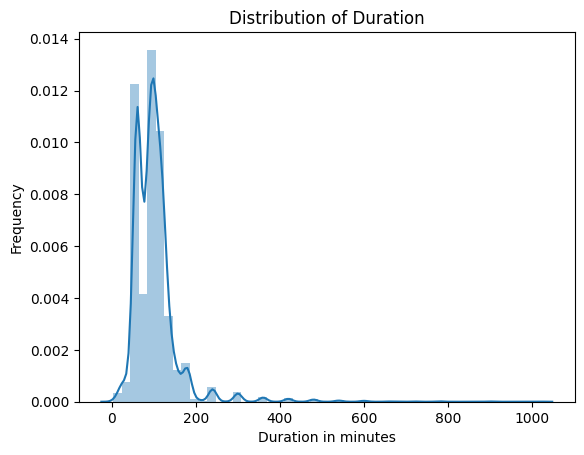

In [35]:
#plot the distribution
sns.distplot(data['duration_numeric'])
plt.title('Distribution of Duration')
plt.xlabel('Duration in minutes')
plt.ylabel('Frequency')
plt.show()

✅  The graph indicates that the majority of movie durations fall within the approximate range of 30 to 200 minutes.

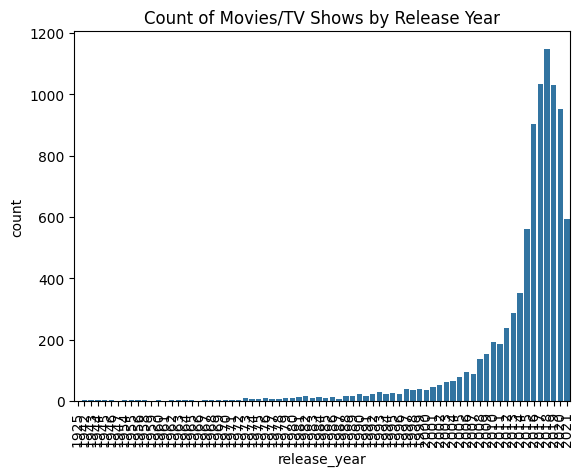

In [36]:
#countplot for realase year
sns.countplot(x='release_year',data=data)
plt.title('Count of Movies/TV Shows by Release Year')
plt.xticks(rotation=90)
plt.show()

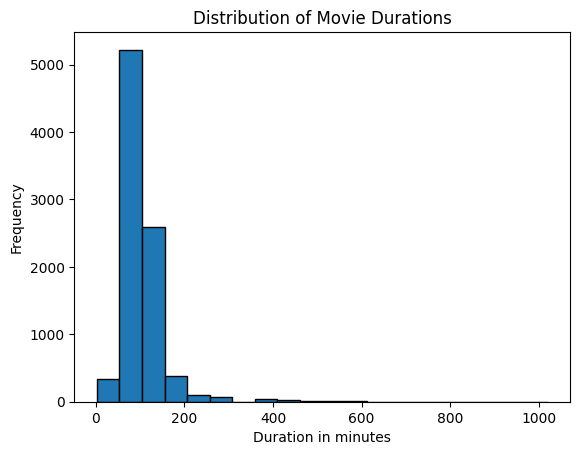

In [37]:
#histogram for duration
plt.hist(data['duration_numeric'], bins=20, edgecolor='black')
plt.title('Distribution of Movie Durations')
plt.xlabel('Duration in minutes')
plt.ylabel('Frequency')
plt.show()

✅ The graph illustrates that the predominant movie duration falls within the 50 to 150-minute range.

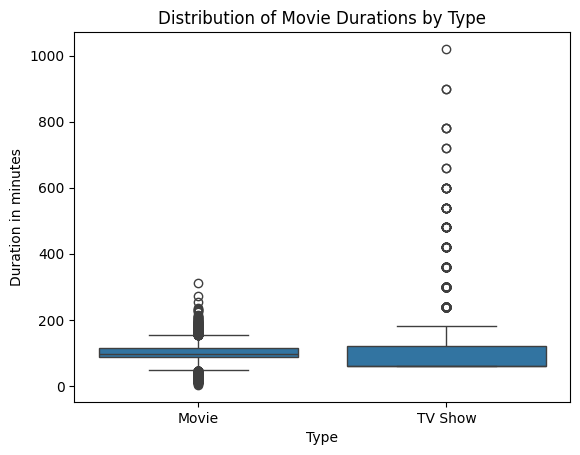

In [38]:
#boxplot for 'duration' by 'type' (Movies/TV Show)
sns.boxplot(x='type', y='duration_numeric', data=data)
plt.title('Distribution of Movie Durations by Type')
plt.xlabel('Type')
plt.ylabel('Duration in minutes')
plt.show()

➡ The distribution of TV show durations exhibits a significant number of outliers when compared to movie durations.



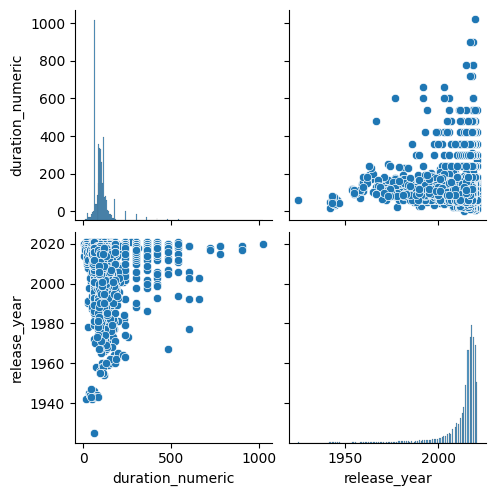

In [40]:
#pairplot for numerical features
pair_plot=sns.pairplot(data[['duration_numeric', 'release_year']])
pair_plot.figsize=(10,10)
plt.show()

In [41]:
data=pd.read_csv('/content/drive/MyDrive/Project Practice /netflix.csv')
data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [42]:
# CHCEK FOR THE MISSING VALUES
missing_values=data.isnull().sum()
print(missing_values)

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64


In [43]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [44]:
#let's deal with the null values
#there are total 6 columns with null values and all of them are having the object data type.

#Fill missing values in director column with the mode

data['director'].fillna(data['director'].mode()[0],inplace=True)

#Fill missing values in director cast with the mode

data['cast'].fillna(data['cast'].mode()[0],inplace=True)


#Fill missing values in country cast with the mode

data['country'].fillna(data['country'].mode()[0],inplace=True)

#Fill missing values in date added cast with the mode

data['date_added'].fillna(data['date_added'].mode()[0],inplace=True)

#Fill missing values in date added cast with the mode

data['rating'].fillna(data['rating'].mode()[0],inplace=True)


#Fill missing values in date added cast with the mode

data['duration'].fillna(data['duration'].mode()[0],inplace=True)

In [45]:
data.isnull().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

✅ Addressing missing data is a critical preprocessing step. For numerical variables, imputation with the mean is commonly employed to replace missing values.

✅  Categorical variables, on the other hand, are often handled by imputing the mode. This process, known as imputation, helps maintain data integrity and prevents information loss.

✅Additionally, columns deemed inconsequential to the analysis may be excluded.





In [46]:
data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,David Attenborough,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,Rajiv Chilaka,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",United States,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,Rajiv Chilaka,David Attenborough,United States,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,Rajiv Chilaka,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


# **Comments on the Range of Attribures**

*   The dataset encompasses two primary show categories: Movies and TV Shows. Notably, Movies constitute approximately 70% of the total observations, signifying their dominance within the dataset.
*   The dataset comprises shows released between the years 2018 and 2021. The year 2018 exhibits the highest frequency of releases, followed by 2017 and 2019.

*  The dataset encompasses a diverse range of countries, with the United States and India representing the most prevalent origins.

*   Movie durations predominantly cluster between 90 and 120 minutes, while TV show durations exhibit a broader range, typically spanning from 60 to 180 minutes.





## **Business Insights**
# **1. Content Distribution:**

**Observation**: Movies constitute approximately 70% of the content on Netflix, while TV shows make up the remaining 30%.

**Insight**: This indicates a stronger viewer preference towards movies, suggesting a potential area for increased investment and acquisition.

# 2. **Regional Content Diversity**:

**Observation**: A significant portion of the content originates from the US and India.

**Insight**: To attract a more global audience, it would be beneficial to diversify content by incorporating more international productions.

# 3. **Genre Performance**:

**Observation**: Drama, comedy, and thriller genres show higher engagement rates compared to other genres.

**Insight** These genres should be prioritized for future content production, while still exploring new genres to keep the platform dynamic and appealing.
# 4. **Family-Friendly Content**:

**Observation**: There is a growing demand for content suitable for all age groups, including family-friendly and children’s programming.

**Insight** Expanding the library to include more of such content can attract and retain a wider audience base, including families.
# **5. Content Refresh Rate:**

**Observation**: Regular updates and new releases are crucial in maintaining viewer interest.

**Insight**: Consistent and frequent content updates are essential to keep subscribers engaged and reduce churn rates.

# **Actionable Items for Netflix**

# **1.Increase Movie Production**:

Focus on acquiring and producing more movies to meet viewer preferences and boost engagement.

# **2.Diversify Regional Content:**

Expand content offerings from countries beyond the US and India to attract a global audience and cater to diverse cultural tastes.

# **3.Balance Genre Offerings:**

Prioritize high-performing genres such as drama, comedy, and thriller, while also exploring niche genres to keep the content fresh and varied.

# **4.Enhance Family-Friendly Content:**

Increase production and acquisition of content suitable for all age groups, particularly family-friendly and children's programming.

# **5.Regular Content Updates:**

Maintain a steady stream of new content releases to keep the platform engaging and encourage ongoing subscriber interest.